# Computer Lab - Semester 4

## Solve Differential Equation

#### 1(a) Solve

\begin{align}
\frac{dy}{dx} = e^{x} ~\text{with} ~y=0 ~\text{for} ~x=0
\end{align}
Find the value of $y$ for $x=1$.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

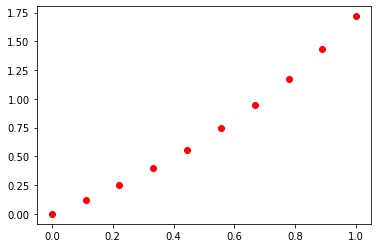

In [2]:
def dy_dx(y, x):
    return np.exp(x)

x = np.linspace(0, 1, 10)
y0 = 0

y = odeint(dy_dx, y0, x)
plt.plot(x, y.reshape(np.size(x),), 'ro')
plt.show()

#### 1(b) Solve

\begin{align}
\frac{dy}{dx} +  e^{-x}y = x^2 ~\text{with} ~y=0 ~\text{for} ~x=0
\end{align}

Find the value of $y$ for $x=1$.

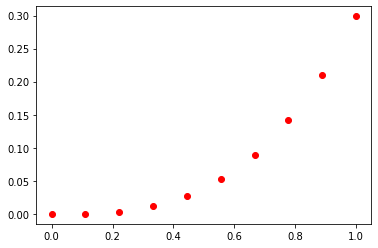

In [3]:
def dy_dx(y, x):
    return x**2 - np.exp(-x)*y

x = np.linspace(0, 1, 10)
y0 = 0

y = odeint(dy_dx, y0, x)
plt.plot(x, y.reshape(np.size(x),), 'ro')
plt.show()

#### 1(c) Solve

\begin{align}
\frac{d^2y}{dt^2} + 2\frac{dy}{dt} = -y ~\text{with} ~y=0.1 ~\text{and}~\frac{dy}{dt}=0 ~\text{for} ~t=0
\end{align}

Find the value of $y$ for $x=1$.

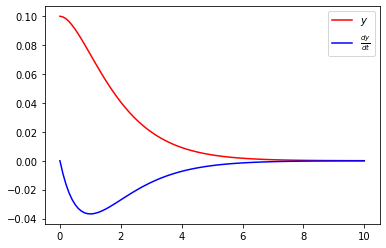

In [11]:
def dz_dt(z, t):
    y, x = z
    dy_dt = x
    dx_dt = -2*x - y
    return [dy_dt, dx_dt]

t = np.linspace(0, 10, 100)
z0 = [0.1, 0]

z = odeint(dz_dt, z0, t)
plt.plot(t, z[:,0].reshape(np.size(t),), 'r-', label='$y$')
plt.plot(t, z[:,1].reshape(np.size(t),), 'b-', label='$\\frac{dy}{dt}$')
plt.legend()
plt.show()

#### 1(d) Solve

\begin{align}
\frac{d^2y}{dt^2} + e^{-t}\frac{dy}{dt} = -y ~\text{with} ~y=0.1 ~\text{and}~\frac{dy}{dt}=0 ~\text{for} ~t=0
\end{align}

Find the value of $y$ for $x=1$.

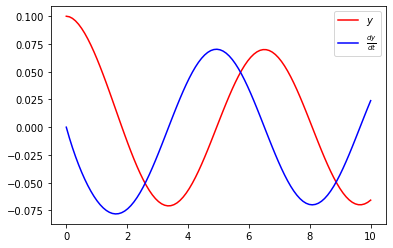

In [12]:
def dz_dt(z, t):
    y, x = z
    dy_dt = x
    dx_dt = -np.exp(-t)*x - y
    return [dy_dt, dx_dt]

t = np.linspace(0, 10, 100)
z0 = [0.1, 0]

z = odeint(dz_dt, z0, t)
plt.plot(t, z[:,0].reshape(np.size(t),), 'r-', label='$y$')
plt.plot(t, z[:,1].reshape(np.size(t),), 'b-', label='$\\frac{dy}{dt}$')
plt.legend()
plt.show()

## Dirac Delta Function

Evaluate
\begin{equation}
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^{\infty}e^{\frac{-(x-2)^2}{2\sigma^2}}(x+3)dx
\end{equation}
for $\sigma = 1, 0.1, 0.01$ and show it tends to 5.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def func(x, sigma):
    d = 1/np.sqrt(2*np.pi*sigma**2)
    c = np.exp(-(x-2)**2/(2*sigma**2))*(x+3)
    return c*d

a, b = -np.inf, np.inf

print('{0:10s}{1:5s}'.format('sigma', 'value of I'))
print('-------------------')
for sigma in [1, 0.1, 0.01]:
    result = quad(func, a, b, args=(sigma))[0]
    print('{0:3.2f} {1:10.3f}'.format(sigma, result))
print('-------------------')

sigma     value of I
-------------------
1.00      5.000
0.10      5.000
0.01      0.000
-------------------


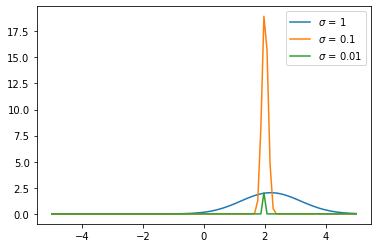

In [47]:
x = np.linspace(-5, 5, 100)
for sigma in [1, 0.1, 0.01]:
    plt.plot(x, func(x, sigma), label='$\sigma$ = '+str(sigma))
plt.legend()
plt.show()

## Fourier Series

Program to sum 
\begin{equation}
\sum_{n=1}^{\infty}(0.2)^{n}
\end{equation}

Evaluate the Fourier coefficients of a given periodic function (square wave).

In [56]:
sum([(0.2**n) for n in range(100)])
    

1.25

## Fourier Series 

For a priodic function $f(x)$, where $f(x+2\pi)=f(x)$
\begin{equation}
\begin{aligned}
&f(x) = \frac{1}{2}a_0 + \sum_{n=1}^{\infty} a_n \cos n x + \sum_{n=1}^{\infty} b_n \sin nx \\
&a_0 = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)dx\\
&a_m = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\cos mxdx\\
&b_m = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\sin mxdx
\end{aligned}
\end{equation}

A square wave function is defined as
\begin{align}
f(x)=
\begin{cases}
-k & -\pi<x<0 \\
k & 0<x<\pi
\end{cases}
\end{align}

It can be shown that for a square wave function
\begin{align}
&a_0 = 0\\
&a_n = 0 
\end{align}

\begin{align}
b_n = 
\begin{cases}
\frac{4k}{n\pi} & \text{if n is odd}\\
0 & \text{if n is even}
\end{cases}
\end{align}
Therefore, Fourier series for a square wave function is given by
\begin{align}
f(x) &= \frac{4k}{\pi}\sum_{n ~~odd}\frac{1}{n}\sin nx\\
&= \frac{4k}{\pi}(\sin x + \frac{1}{3}\sin 3x +\frac{1}{5}\sin 5x + \cdots)
\end{align}

In [7]:
import numpy as np
import matplotlib.pyplot as plt

k=1

print('Fourier coefficients:')
print('----------------------')
for n in range(1, 5):
    b = 4*k/(n*np.pi) 
    print('b'+str(n)+' = '+str(round(b,3)))
print('----------------------')

Fourier coefficients:
----------------------
b1 = 1.273
b2 = 0.637
b3 = 0.424
b4 = 0.318
----------------------


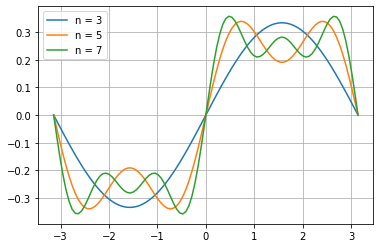

In [62]:
# Demonstration of Fourier series for square wave for different order of harmonics

f = lambda n, x: (1/(2*n+1))*np.sin(n*x)

x_range = np.linspace(-np.pi, np.pi, 100)

fsum = []
for n_range in range(3, 9, 2):
    for x in x_range:
        fsum.append([sum([f(n, x) for n in range(1, n_range, 2)])])
    plt.plot(x_range, fsum, label='n = '+str(n_range))
    fsum = []
plt.legend()
plt.grid()
plt.show()

## Legendre's Polynomial

Legendre polynomials are a type of orthogonal polynomials which occur often in science and engineering. Hence, their generation is crucial to those fields. There are different ways to evaluate a Legendre polynomial, using generating functions, Rodrigues formula, recurrence relation, Gram-Schmidt orthogonalization etc. One of the easiest and also one of the most accurate, method is using recurrence relation.

Here we use Bonnet’s recurrence relation of legendre polynomials, i.e, –

\begin{align}
nP_n(x) = (2n-1)xP_{n-1}(x) - (n-1)P_{n-2}(x)
\end{align}

It can be implemented using Python by proceeding as follows-

We define Legendre polynomials as a function named P(n, x), where n is called the order of the polynomial and x is the point of evaluation. The base cases are if n is 0, then The value of the polynomial is always 1, and it is x when order is 1. These are the seed values required for the recurrence relation.

For other values of n, the function is recursively defined, directly from the Bonnet’s recurrence. Thus, P(n, x) returns values of the Legendre polynomial, by recursion method

Source: [geeksforgeeks](https://www.geeksforgeeks.org/python-legendre-polynomials-using-recursion-relation/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

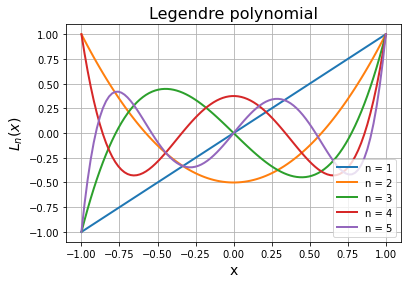

In [68]:
# Defining Legendre Polynomial - 1
def P(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return ((2*n - 1)*x*P(n-1, x) - (n-1)*P(n-2, x))/n

def LegendrePlot(n, x):
    plt.plot(x, P(n, x), lw=2, label='n = '+str(n))
    plt.legend(loc='upper right', fontsize=14)
    plt.title('Legendre polynomial', fontsize=16)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('$L_n(x)$', fontsize=14)
    plt.grid('True')
    plt.legend(loc='best')
    
x = np.linspace(-1, 1, 100)
for n in range(1, 6):
    LegendrePlot(n, x)


## Bessel's function

It is defined as
\begin{equation}
J_m(x)=\frac{1}{\pi}\int_{0}^{\pi}cos(m\theta-xsin\theta)d\theta
\end{equation}

In [69]:
def BesselFunc(m, x):
    '''
    Here, we are using Simpson's 1/3 rd rule to evaluate the integral
    '''
    theta = np.linspace(0, np.pi, 1000)
    N = len(theta)
    a = theta[0]
    b = theta[N-1]
    h = (b - a)/N
    def func(m, x, theta):
        return (1/np.pi)*np.cos(m*theta - x*np.sin(theta))
    s_odd = 0
    s_even = 0
    
    for k in range(1, N, 2):
        s_odd += func(m, x, theta[k])

    for k in range(2, N, 2):
        s_even += func(m, x, theta[k])
    I = (1/3)*h*(theta[0] + theta[N-1] +4*s_even +2*s_odd)
    return I

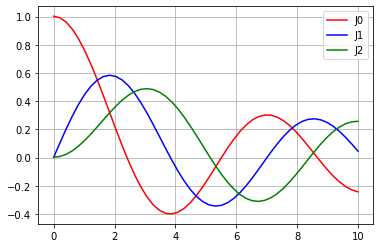

In [73]:
J = np.zeros((3, 50))
X = np.linspace(1e-15, 10)

for m in range(3):
    i = 0
    for x in X:
        J[m, i] = BesselFunc(m, x)
        i += 1
J0 = J[0, :]
J1 = J[1, :]
J2 = J[2, :]

plt.plot(X, J0, 'r', label='J0')
plt.plot(X, J1, 'b', label='J1')
plt.plot(X, J2, 'g', label='J2')
plt.legend()
plt.grid()
plt.show()

## Trigonometric functions

We can write $\sin \theta$, if we expand interms of $\theta$ according to Maclaurin series,
\begin{align}
\sin \theta &= \theta - \frac{\theta^3}{3!} + \frac{\theta^5}{5!} - \cdots\\
&=\sum_{n=0}^{\infty}\frac{(-1)^n x^{2n+1}}{(2n + 1)!}
\end{align}

In [22]:
def factorial(n):
    if n == 1:
        return 1
    else:
        return n*factorial(n-1)

theta_deg = 45
theta_rad = np.radians(theta_deg)    
val = sum([(-1)**n*theta_rad**(2*n+1)/factorial(2*n + 1) for n in range(7)])
print('sin '+str(theta_deg)+' = '+str(round(val, 3)))

sin 45 = 0.707


## Complex analysis

Integrate 
\begin{equation}
\int_{-\infty}^{\infty}\frac{1}{1+x^2}dx
\end{equation}

#### By Numerical approach using function from SciPy

In [85]:
from scipy.integrate import quad

f = lambda x: 1/(1 + x**2)

quad(f, -np.inf, np.inf)

(3.141592653589793, 5.155583041103855e-10)

#### By using analytical approach using SymPy

In [94]:
from sympy import *
x = Symbol('x')

integrate(1/(1+x**2), (x, -oo, oo))

pi

In [95]:
N(_)

3.14159265358979

Both the answers agree with each other.

## Roots of a complex number

Consider a complex number
\begin{align}
z = re^{i\theta}
\end{align}

It's $n$th root can be written as
\begin{align}
z^{\frac{1}{n}}=r^{\frac{1}{n}}e^{\frac{i\theta}{n}}
\end{align}

But the result is not unique. Let us write the complex number in a different way.
\begin{align}
z = r e^{i(\theta + 2\pi k)}\hspace{0.5cm}\text{where}\hspace{0.5cm}k=0,~1,~2,\cdots
\end{align}

Now, the $n$th roots of the compex number is written as
\begin{align}
z^{\frac{1}{n}} = r^\frac{1}{n} e^{\frac{i(\theta + 2\pi k)}{n}}\hspace{0.5cm}\text{where}\hspace{0.5cm}k=0,~1,~2,\cdots,~(n-1)
\end{align}

In [3]:
# How to represent a complex number

from cmath import *

z = 1 + 2*1j;z

(1+2j)

In [5]:
# To convert a complex number from cartesian form to polar form

r, theta = polar(z);r, theta

(2.23606797749979, 1.1071487177940904)

In [10]:
# and vice versa

z = rect(r, theta);z, z.real, z.imag

((1.0000000000000002+2j), 1.0000000000000002, 2.0)

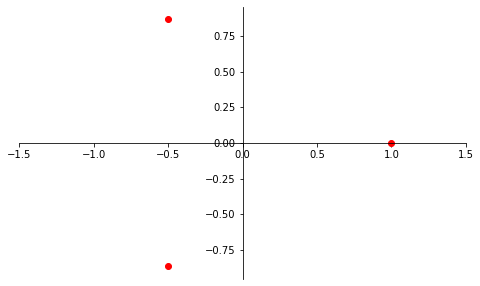

In [16]:
def root(z, n):
    # Converting 'z' to polar form
    r, phi = polar(z)
    # Finding roots
    roots = [r**(1/n)*exp(1j*(phi + 2*k* pi)/n) for k in range(n)]
    return roots

z, n = 1, 3

z_root = root(z, n)

import matplotlib.pyplot as plt

def plot():
    fig, ax = plt.subplots(figsize=(8, 5))
    # set the x-spine
    ax.spines['left'].set_position('zero')

    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()

    # set the y-spine
    ax.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()

plot()
for i in range(len(z_root)):
    plt.plot(z_root[i].real, z_root[i].imag, 'ro')
plt.xlim(-1.5,1.5)
plt.show()